In [2]:
# Import Dependencies.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [6]:
# Database setup.
engine = create_engine('sqlite:///hawaii.sqlite')

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

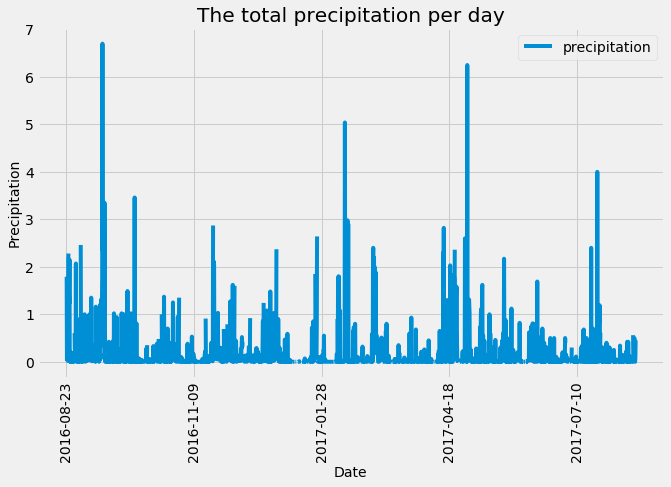

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

## Add the most recent date, August 23, 2017 and calculate the date one year back. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores.

## create a variable to store the results of the query.
results = []

## Query the database.
results = session.query(Measurement.date, Measurement.prcp).all()


## We want to see the most recent data, we need to filter out all of the data that is 
## older than a year from the last record date.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column.

df = pd.DataFrame(results, columns = ['date', 'precipitation'])

## By setting inplace=True, we’re saying that we do not want to create a new DataFrame.
df.set_index(df['date'], inplace = True)

## Print the dataframe with the index.
print(df)
    
## Print the dataframe without the index.
print(df.to_string(index = False))

# Sort the dataframe by date.

df = df.sort_index()
print(df.to_string(index = False))

# Use Pandas Plotting with Matplotlib to plot the data.


df.plot(figsize = (10, 6))
plt.title('The total precipitation per day')
plt.ylabel('Precipitation', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

In [85]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?

## Get the number of stations from which precipitation data is being collected. 
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.

## we want to figure out which stations tend to have the most precipitation recordings.
session.query(Measurement.station, func.count(Measurement.station)). \
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)). \
filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

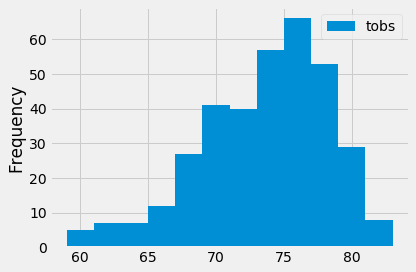

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281"). \
filter(Measurement.date >= prev_year).all()
print(results)

# Covert the result values into a dataframe for better understanding.
df = pd.DataFrame(results, columns = ['tobs'])
print(df.to_string(index = False))

# Going to divide our temperature observations into 12 different bins.
df.plot.hist(bins = 12)
# Compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()


In [47]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    if not end_date:
        results = session.query(*sel).filter(Measurement.date <= start_date).all()
        temps = list(np.ravel(results))
        return (temps)

    results = session.query(*sel).\
           filter(Measurement.date >= start_date).\
           filter(Measurement.date <= end_date).all()
    temps = list(np.ravel(results))
    return(temps)


In [55]:
calc_temps('2017-06-1','2017-06-30')

[71.0, 76.96992481203007, 83.0]

# Challenge

In [111]:
# 1). Identify key statistical data in June across all of the stations and years using the describe() function.

results = session.query(Measurement.station, Measurement.date, Measurement.tobs, Measurement.prcp). \
            filter(extract('month', Measurement.date) == 6).all()
# print(results)

# Convert the results into a dataframe.
df = pd.DataFrame(results, columns = ('Station', 'Date','Tobs', 'Prcp'))
# print(df.to_string(index = False))
df.describe()

,Tobs,Prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [109]:
# 2). Identify key statistical data in December across all stations and years using the describe() function.

results = session.query(Measurement.station, Measurement.date,Measurement.tobs, Measurement.prcp). \
            filter(extract('month', Measurement.date) == 12).all()
# print(results)
df = pd.DataFrame(results, columns = ('Station', 'Date','Tobs', 'Prcp'))
# print(df.to_string(index = False))
df.describe()

,Tobs,Prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


3). Share your findings in the Jupyter Notebook with a few sentences describing the key differences
 in weather between June and December and 2-3 recommendations for further analysis.

There are 1700 total number of temperature observations for the month of June across all of the stations and years in the measurement table where as there are 1517 total number of temperature observations for the month of December across all of the stations and years in the measurement table. There are more null values for temperature observations during the month of December in comparison to June.

The average number of temperature observations for the month of June is 74.944118 and the average number of temperature observations for the month of December is 71.041529.The temperature values are lower for the month of Decemeber as compared to June.

The standard deviation of temperature observations for June is 3.257417 and the standard deviation of temperature observations for December is 3.745920.The standard deviation for June is slightly low as compared to the standard deviation for December. The temperature values for the month of June are litter closer to the meanwhile the values of temperature for the month of December are spread out a bit.

The smallest value for temperature recorded in the dataset for the months of June is 64 and for Decemeber it is 56.The largest temperature value for the months of June is 85 and the highest temperature recorded in December is 83. 

The 25th percentile temperature for the months of June is 73 and December is 69, there is only a difference of 1 between the two. The median or the 50th percentile for temperature for June is 75 and the median or the 50th percentile temperature for December is 71. The median (the middle value) for June is lower than in December, there is a difference of 4 between the median of temperature for December and June.

The 75th percentile for temperature for the month of June is 77 and for December the 75th percentile for temperature is 74. The 75th percentile temperature for June is a higher than of Decemeber, there is slight a difference of 3 between the 75th percentile of precipitation in December and June.

There are 1574 total number of precipitation for the month of June across all of the stations and years in the measurement table where as there are 1405 total number of precipitation for the month of December across all of the stations and years in the measurement table. There are more null values for precipitation in the month of December in comparison to June. 

The average number of precipitation for the month of June is 0.14 and the average amount of precipitation for the month of December is 0.22. There is more precipitation in the month of Decemeber as compared to June so we can conclude that there is more precipitation in winter as compared to summer in Oahu.

The standard deviation of precipitation in June is 0.34 and the standard deviation of precipitation in December is 0.54. The standard deviation for June is low as compared to the standard deviation for December. The precipitation values for the month of June are closer to the meanwhile the values of precipitation for the month of December are spread out over a wide range.

The smallest value for precipitation recorded in the dataset for the months of June and Decemeber is 0. The largest value for precipitation in the months of June is 4.43 and the largest value for precipitation recorded for December is 6.42. 

The 25th percentile precipitation for the months of June and December is 0. The median or the 50th percentile precipitation in June is 0.02 and the median or the 50th percentile precipitation for December is 0.03. The median (the middle value) for June is lower than in December, there is a difference of 0.01 between the median of precipitation in December and June.

The 75th percentile precipitation for the month of June is 0.12 and for December the 75th percentile precipitation is 0.150000. The 75th percentile precipitation in June is a little lower than of Decemeber, there is slightly a difference of 0.03 between the 75th percentile of precipitation in December and June.


CONCLUSION: 

The mean temperature for the month of June is 74.94, and the mean temperature for December is 71.04 across all the stations and years in the measurement table. Temperature is higher in the month of June as compared to December. In summer a lot of people enjoy surfing, and they are more likely to eat ice cream with warmer temperatures. It is much warmer in June since the minimum temperature value is 64 and the minimum temperature value in December is 56.
Also, there is more precipitation in the month of December as compared to June, so we can conclude that there is more precipitation in winter time as compared to summer. After viewing the statistics we can say that the seasons could affect the surf and ice cream shop business. Therefore, surfing business might be slower in winter in contrast to summer in Oahu.